In [26]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [27]:
df.T.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [28]:
#import t distribution to calculate the error in bars with 95% confidence interval
from scipy.stats import t

avg = df.mean(axis = 1)
std = df.std(axis = 1)
err = std / (np.sqrt(df.shape[1]) * t.ppf(1-(1-0.95)/2, df.shape[1]-1))
err

1992    1693.788672
1993     830.709625
1994    1185.046707
1995     589.114541
dtype: float64

<IPython.core.display.Javascript object>


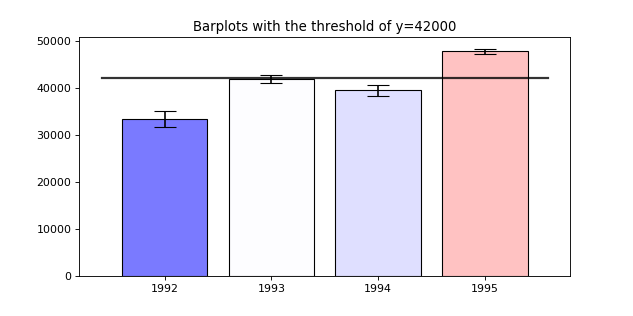

6

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook
th = 42000
fig = plt.figure(figsize = (8,4))

barplot = plt.bar(range(df.shape[0]), avg, yerr=err, capsize=10)
threshold = plt.plot(plt.xlim(), [th, th], color='black',alpha=.8, lw=2)
#plt.plot([-0.5, 4], [th, th], 'r')
plt.xticks(range(df.shape[0]), df.index)
plt.title('Barplots with the threshold of y=42000')

bars = barplot.get_children()
for bar, a, e in zip(bars, avg, err):
        
        #(r,b,g,alpha)
        bar.set_color(((th < a), 0, (th > a), abs(th - a)*2/a))
        bar.set_edgecolor((0,0,0,1))

plt.show()
plt.savefig('ass-3 img')

# 2nd part building up interactivity with click taing y value to set threshold.
def onclick(event):
    th = event.ydata
    fig.canvas.draw() 
    threshold.set_ydata([th,th])
    for bar, a, e in zip(bars, avg, err):
        
        #(r,b,g,alpha)
        bar.set_color(((th < a), 0, (th > a), abs(th - a)*2/a))
        bar.set_edgecolor((0,0,0,1))
    plt.gcf().canvas.draw_idle()
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

6